# 3.3 目标检测大模型简介和应用

## 目标检测
前面两节课程，主要是使用多模态大模型进行图片理解，而如果需要对目标干点啥，则需要获得目标的位置，这个就是目标检测功能，俗称画框bbox。

<img src="img/bbox.png" width='640px' />


### **目标检测（目标识别）简介**
**目标检测**（Object Detection）是计算机视觉的核心任务之一，旨在从图像或视频中识别特定物体并精确定位其位置（通常用边界框表示）。它不仅需要判断物体的类别（如“汽车”“行人”），还需确定其在图像中的具体坐标。与仅分类的**图像分类**和像素级分割的**图像分割**相比，目标检测更注重多物体、多类别的综合定位与识别。

---

#### 1. **传统方法**（2010年前）
• **流程**：滑动窗口生成候选区域 → 手工提取特征（如SIFT、HOG） → 分类器（如SVM）分类。

• **缺点**：计算冗余大、特征鲁棒性差，难以应对复杂场景。

#### 2. **深度学习方法**（2012年-2020年）
• **流程**：
  1. **特征提取**：通过卷积神经网络（CNN）自动学习图像特征；
  2. **边界框回归**：预测物体的位置坐标（中心点、宽高）；
  3. **分类与优化**：结合交并比（IoU）评估预测框与真实框的重叠度，使用非极大值抑制（NMS）消除冗余框。
     
• **主流范式**：
1. **Two-Stage**（双阶段）：首先生成候选区域（如Faster R-CNN的RPN网络），再精细分类和定位，精度高但速度较慢；
2. **One-Stage**（单阶段）：直接预测边界框和类别（如YOLO系列），速度快但小目标检测能力较弱；
3. **YOLO系列**（典型模型）：单阶段模型，实时检测速度快，适合自动驾驶、监控场景；


#### 3. **前沿趋势**

<img src="img/s3-1.png" width='640px' />

1. 基于自注意力机制, Transformer-Based（如DETR），端到端检测无需NMS，但训练资源消耗大。
2. 在大模型驱动下，从传统的封闭集（预定义类别）向开放世界（开域）场景拓展.
3. 能够根据自然语言描述或视觉示例检测任意类别目标，突破了传统检测模型对固定类别的依赖，其核心在于多模态语义对齐和端到端泛化能力的强化.


目标识别大模型排名

<img src="img/dino.jpg" width='800px' />


## 云平台服务

- DINO 开源：https://github.com/IDEA-Research/DINO
- Grounding-DINO 开源：https://github.com/IDEA-Research/GroundingDINO
- DINO 线上服务：https://cloud.deepdataspace.com/playground/grounding_dino
- DINO 服务API：https://cloud.deepdataspace.com/docs#model/dinox


<img src='img/dino-s.png' width='720px' />

定价 Grounding DINO	0.1元/次

注册就有20元，够用200次

token申请：https://cloud.deepdataspace.com/dashboard/token-key


In [1]:
!git clone https://github.com/IDEA-Research/Grounding-DINO-1.5-API.git

Cloning into 'Grounding-DINO-1.5-API'...


In [ ]:
!pip install torch

In [2]:
!cd Grounding-DINO-1.5-API
!pip install -v -e .

Using pip 25.0 from C:\Users\wangl\miniconda3\envs\airsim_agent\lib\site-packages\pip (python 3.10)
Obtaining file:///C:/Users/wangl/PycharmProjects/airsim_agent/3-mulitmode_app


ERROR: file:///C:/Users/wangl/PycharmProjects/airsim_agent/3-mulitmode_app does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
注意，上面安装完成后，可能需要重启下本实验的内核

In [12]:
from gdino import GroundingDINOAPIWrapper, visualize
from PIL import Image
import numpy as np

In [13]:
gdino = GroundingDINOAPIWrapper("885af84f607caa6a12ba509b6c3c03a7") #使用自己的token

In [4]:
prompts = dict(image='img/p-4-1-s.png', prompt='yellow duck.Cola')

In [5]:
results = gdino.inference(prompts)
results

{'boxes': [[421.91314697265625,
   142.26571655273438,
   439.9795227050781,
   170.5565948486328],
  [360.0000915527344,
   136.93106079101562,
   385.91448974609375,
   170.29820251464844],
  [753.208740234375, 439.7015075683594, 769.0044555664062, 455.98388671875],
  [788.5809326171875,
   440.2593688964844,
   801.4175415039062,
   455.5614013671875]],
 'categorys': ['cola', 'yellow duck', 'yellow duck', 'cola'],
 'scores': [0.612587571144104,
  0.7343294024467468,
  0.41891080141067505,
  0.3202586770057678],
 'masks': []}

In [9]:
image_pil = Image.open(prompts['image'])
image_pil = visualize(image_pil, results)

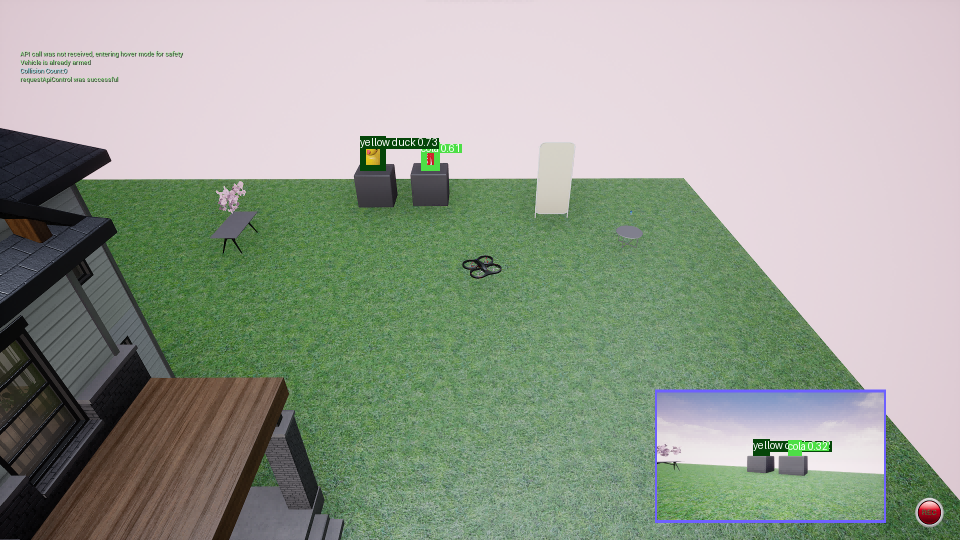

In [10]:
from IPython.display import display
display(image_pil)

## opencv读取

In [18]:
local_image_path = "img/p-4-1-s.png"
image = cv2.imread(local_image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [20]:
import uuid
bgr_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR)
# 2. 生成随机文件名（含扩展名）
file_name = f"random_{uuid.uuid4().hex}.png"  # 示例输出：random_1a2b3c4d5e.png
cv2.imwrite(file_name, bgr_image)

True

In [21]:
prompts = dict(image=file_name, prompt='yellow duck.Cola')

In [22]:
results = gdino.inference(prompts)
results

{'boxes': [[753.208740234375,
   439.7015075683594,
   769.0044555664062,
   455.98388671875],
  [360.0000915527344,
   136.93106079101562,
   385.91448974609375,
   170.29820251464844],
  [421.91314697265625,
   142.26571655273438,
   439.9795227050781,
   170.5565948486328],
  [788.5809326171875,
   440.2593688964844,
   801.4175415039062,
   455.5614013671875]],
 'categorys': ['yellow duck', 'yellow duck', 'cola', 'cola'],
 'scores': [0.41891080141067505,
  0.7343294024467468,
  0.612587571144104,
  0.3202586770057678],
 'masks': []}

In [23]:
results["categorys"]

['yellow duck', 'yellow duck', 'cola', 'cola']